In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.shape

(200, 4)

In [6]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


array([[<Axes: title={'center': 'TV'}>,
        <Axes: title={'center': 'Radio'}>],
       [<Axes: title={'center': 'Newspaper'}>,
        <Axes: title={'center': 'Sales'}>]], dtype=object)

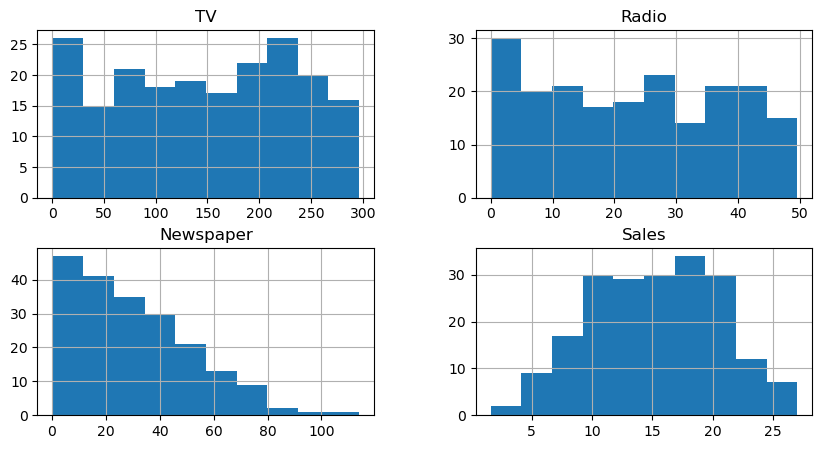

In [10]:
df.hist(figsize=(10,5))

In [19]:
corr_matrix=df.corr()
corr_matrix

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<Figure size 1000x600 with 0 Axes>

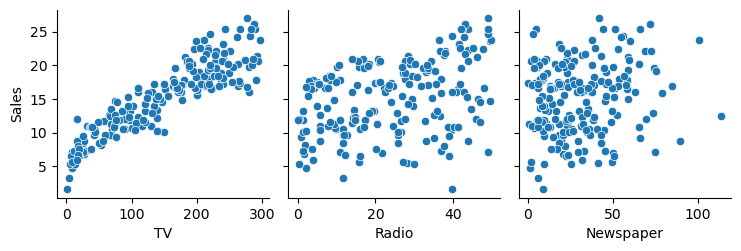

In [20]:
plt.figure(figsize=(10,6))
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'],y_vars='Sales')
plt.show()

In [24]:
X= np.array(df.drop('Sales', axis=1))
y= np.array(df['Sales']).reshape(-1, 1)
print(X.shape)
print(y.shape)

(200, 3)
(200, 1)


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# NORMALIZING OUR DATA
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X_train=scaler.fit_transform(X_train)
scaled_X_test=scaler.transform(X_test)

### Sales Prediction by using ML models

In [27]:
# LINEAR REGRESSION
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model=lr.fit(scaled_X_train,y_train)
y_pred=model.predict(scaled_X_test)

In [29]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2=r2_score(y_test,y_pred)
print("Mean Squared Error:", mse)
print("R2 Score:",r2)

Mean Squared Error: 2.9077569102710914
R2 Score: 0.9059011844150826


In [31]:
# RANDOM FOREST 
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
model=RF.fit(scaled_X_train,y_train)
y_pred2=model.predict(scaled_X_test)

C:\Users\avinash kumar\AppData\Local\Temp\ipykernel_2448\3429068888.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model=RF.fit(scaled_X_train,y_train)


In [32]:
mse = mean_squared_error(y_test, y_pred2)
r2=r2_score(y_test,y_pred2)
print("Mean Squared Error:", mse)
print("R2 Score:",r2)

Mean Squared Error: 1.382054400000002
R2 Score: 0.9552749125435663


### Checking model performance

In [33]:
linr = pd.DataFrame({'actual': y_test.flatten(), 'predicted': y_pred.flatten()})
linr.head()

,actual,predicted
0,16.9,17.034772
1,22.4,20.409740
2,21.4,23.723989
3,7.3,9.272785
4,24.7,21.682719


Text(0.5, 1.0, 'Model Performance')

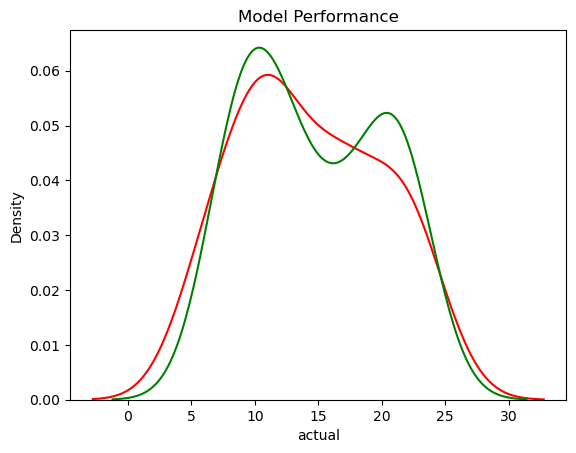

In [38]:
ax = sns.kdeplot(linr['actual'], color='r', label='Actual Price')
sns.kdeplot(linr['predicted'], color='g', label='Predicted Price', ax=ax)
plt.title("Model Performance")

In [36]:
# FOR RANDOM FOREST
Forest = pd.DataFrame({'actual': y_test.flatten(), 'predicted': y_pred2.flatten()})
Forest.head()

,actual,predicted
0,16.9,17.427
1,22.4,22.871
2,21.4,19.652
3,7.3,6.797
4,24.7,22.920


In [37]:
import warnings
warnings.filterwarnings('ignore')

Text(0.5, 1.0, 'Model Performance')

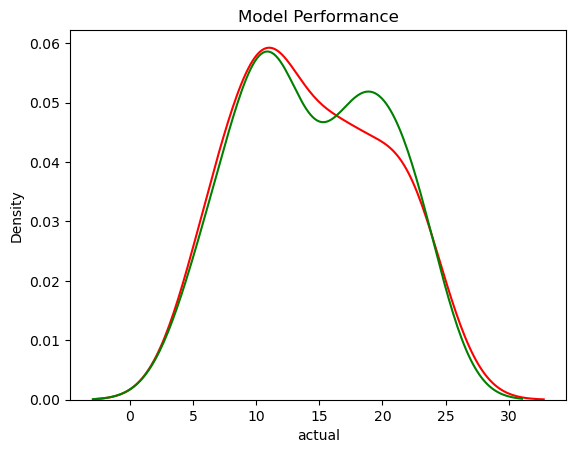

In [39]:
ax = sns.kdeplot(Forest['actual'], color='r', label='Actual Price')
sns.kdeplot(Forest['predicted'], color='g', label='Predicted Price', ax=ax)
plt.title("Model Performance")